# Project: Investigate a Dataset - [TMDb_Movie_Data]
>I will investigate this Dataset by applying Data Analysis Proccess on it using NUMPY, PANDAS, MATPLOTLIB and 
some useful packages to achieve my investigate.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This data set contains information about 10,000 movies collected from The Movie Database (TMDb),
 including user ratings and revenue. [here]( https://www.kaggle.com/tmdb/tmdb-movie-metadata ). 


### Question(s) for Analysis
>Which genres are most popular from year to year?

>What kinds of properties are associated with movies that have high revenues?

>Which movie achieved the highest revenue and the lowest one?

>Which movie achieved the highest or lowest votes?

>Which movie cost highest and lowest Budget?

>In which year release highest number of movies?

>Top 10 movies which achieved highest profits?

>Top 10 Production Companies produced higher number of release Movies?

>Top 10 Director Who directs highest number of movies movies?

>Most popular star cast?
 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>Now I will take a look inside the dataset to check and find out all info I need to begin and dropping unused data.


### General Properties


In [4]:
df = pd.read_csv('tmdb-movies.csv')

df.head(3)

id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   
2  262500  tt2908446   13.112507  110000000   295238201           Insurgent   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   

                                         homepage          director  \
0                   http://www.jurassicworld.com/   Colin Trevorrow   
1                     http://www.madmaxmovie.com/     George Miller   
2  http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   

                      tagline  ...  \
0           The park is open.  ...   
1          What a Lovely Day.  ...   
2  One Choice Can Destroy You  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  

[3 rows x 21 columns]

In [5]:
df.tail(3)

id    imdb_id  popularity  budget  revenue  \
10863  39768  tt0060161    0.065141       0        0   
10864  21449  tt0061177    0.064317       0        0   
10865  22293  tt0060666    0.035919   19000        0   

                 original_title  \
10863       Beregis Avtomobilya   
10864    What's Up, Tiger Lily?   
10865  Manos: The Hands of Fate   

                                                    cast homepage  \
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...      NaN   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...      NaN   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...      NaN   

               director                                       tagline  ...  \
10863    Eldar Ryazanov                                           NaN  ...   
10864       Woody Allen                     WOODY ALLEN STRIKES BACK!  ...   
10865  Harold P. Warren  It's Shocking! It's Beyond Your Imagination!  ...   

                                                overview runtime  \
10863  An insurance agent who moonlights as a carthie...      94   
10864  In comic Woody Allen's film debut, he took the...      80   
10865  A family gets lost on the road and stumbles up...      74   

               genres     production_companies release_date vote_count  \
10863  Mystery|Comedy                  Mosfilm       1/1/66         11   
10864   Action|Comedy  Benedict Pictures Corp.      11/2/66         22   
10865          Horror                Norm-Iris     11/15/66         15   

       vote_average  release_year     budget_adj  revenue_adj  
10863           6.5          1966       0.000000          0.0  
10864           5.4          1966       0.000000          0.0  
10865           1.5          1966  127642.279154          0.0  

[3 rows x 21 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
df.shape

(10866, 21)

In [8]:
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

In [9]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

After check the Dataset I find out that it contains:

>     Number of Rows = 10866.
>     Number of Columns = 21.
>     Some columns contain NaN values.
>     Some columns's values is count of money but it's 0 value and there's no currency: 
>            I will use dolar as currency.
>     Some of the nan values is in String dtype so:
>            I will use fill nan values with zero. 
         

In [10]:
df = df.fillna(0)


### Data Cleaning

>  Drop Duplicate rows.

>  Remove unuseble data.

>  Cahnge type of release date column to datetime.

>  Remove items having zero value of budget and revenue.

##### 1. duplicated():
> function in pandas return the duplicate row as True and othter as False for counting the duplicate elements we sum all   the rows.


In [11]:
sum(df.duplicated())

1

After calculating the duplicate row we can drop these row using 'drop_duplicates()' function

In [12]:
#drop duplicates
df.drop_duplicates(inplace = True)

In [13]:
#after dropping
df.shape

(10865, 21)

##### 2. Remove the unused colums that are not needes in the analysis process
We can see that 21 columns in the dataset, We can drop the the colums which are not usable in the data analysis process. columns like: imdb_id,overview etc.
The columns like imdb_id, homepage,tagline, overview, budget_adj and revenue_adj are not required for my analysis and I will drop these columns.

In [14]:
#remove unuseable data
df.drop(['imdb_id','homepage','tagline','overview','budget_adj','revenue_adj'],axis =1,inplace = True)

In [20]:
#after remove
df.shape

(10865, 15)

##### 3. Changing Format Of Release Date Into Datetime Format
the the given in the dataset is in string format.
So we need to change this in datetime format

In [21]:
df['release_date']=pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

##### 4. Drop theses rows which contain incorrect or inappropriate values.

As you can see in this database of movies there are lots of movies where the budget or revenue have a value of '0' which means that the values of those variables of those movies has not been recorded. Calculating the profits of these movies would lead to inappropriate results. I think this may be due to varying factors like the lack of information, or the movies that were never released. I have chosen to eradicate these values during the data cleaning phase.

In [22]:
#removing zero values in the budget and revenue columns
df[(df['budget']==0)].shape[0]
df[(df['revenue']==0)].shape[0]

6016

In [23]:
df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> Now that we've trimmed and cleaned our data, we're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that I posed in the Introduction section.


## Research Question 1:: Which genres are most popular from year to year?

map all the rows of genres in a list.

In [77]:
genre_details = list(map(str,(new_df['genres'])))

make an array that contain genres without any seperator.

In [78]:
genre = ['Adventure', 'Science Fiction', 'Fantasy', 'Crime', 'Western', 'Family','nan', 'Animation','War','Mystery','Romance','TV Movie','Action', 'Thriller','Comedy','Drama' , 'History', 'Music', 'Horror', 'Documentary', 'Foreign']

make the numpy array of year and popularity which contain all the rows of release_year and popularity column.

In [79]:
year = np.array(df['release_year'])
popularity = np.array(df['popularity'])

make a null dataframe which indexs are genres and columns are years.

In [80]:
popularity_df = pd.DataFrame(index = genre, columns = range(1960, 2016))

change all the values of the dataframe from NAN to zero.

In [81]:
popularity_df = popularity_df.fillna(value = 0.0)

Make a dataframe for popularity

In [82]:
z = 0
for i in genre_details:
    if i == '0':
        z+=1
        continue
    else:
        split_genre = list(map(str,i.split('|')))
        popularity_df.loc[split_genre, year[z]] = popularity_df.loc[split_genre, year[z]] + popularity[z]
        z+=1

create function to calculate the standard deviation for the accurate results.

In [83]:
def calculate_std(x):
    return (x-x.mean())/x.std(ddof=0)

popular_genre = calculate_std(popularity_df)
popular_genre.head()

1960      1961      1962      1963      1964      1965  \
Adventure        0.753047  1.338265  1.996432  1.398764  0.550490  1.124313   
Science Fiction -0.467064 -0.361952 -0.640003 -0.646572 -0.667888 -0.869288   
Fantasy         -0.528631 -0.744050 -0.691929 -0.895883 -0.012691 -0.992961   
Crime           -0.607773 -0.111525 -0.192078 -0.020849  0.082887 -0.523188   
Western          0.705451 -0.588007 -0.266409 -0.863575 -1.009777 -0.527569   

                     1966      1967      1968      1969  ...      2006  \
Adventure        0.951448  1.817532  1.534066  1.097634  ...  0.608896   
Science Fiction  0.097082 -0.634089  1.452081 -0.710447  ... -0.285369   
Fantasy         -0.585750 -0.706100 -0.055098 -0.771756  ...  0.064256   
Crime           -0.034184  0.517043  0.209143  0.593035  ...  0.085715   
Western         -0.028313 -0.775331 -0.824684  0.996730  ... -1.032584   

                     2007      2008      2009      2010      2011      2012  \
Adventure        0.520337  0.755174  0.977631  1.034615  0.586530  0.732544   
Science Fiction -0.305635  0.082638  0.679385 -0.104055  0.212188  0.190799   
Fantasy          0.322410  0.008939  0.178692  0.153667  0.028812  0.082090   
Crime            0.302191  0.298436 -0.394756 -0.170911 -0.059809  0.093366   
Western         -1.024569 -1.057870 -1.110691 -0.973921 -0.992158 -0.866364   

                     2013      2014      2015  
Adventure        0.755614  1.174404  1.614642  
Science Fiction  0.575286  0.902144  1.231916  
Fantasy         -0.182319 -0.108114 -0.320226  
Crime            0.347619 -0.219150  0.027460  
Western         -0.973786 -0.925491 -0.758947  

[5 rows x 56 columns]

plot the barh plot of the standardised data.

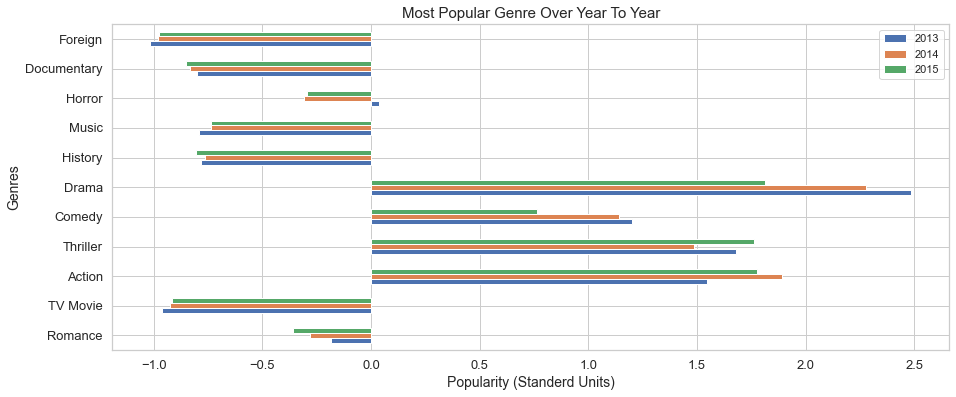

In [84]:
popular_genre.iloc[10:,53:].plot(kind='barh',figsize = (15,6),fontsize=13)

#setup the title and labels of the plot.
plt.title("Most Popular Genre Over Year To Year",fontsize=15)
plt.xlabel("Popularity (Standerd Units)",fontsize=14)
plt.ylabel("Genres",fontsize = 14)
sns.set_style("whitegrid")

>>From this we findout that Drama is the most popular genre, following by action, comedy and thriller.

### Research Question 2:: What kinds of properties are associated with movies that have high revenues?

In [24]:
details = pd.DataFrame(df['revenue'].sort_values(ascending=False))
another_data_set = ['id','popularity','budget','original_title','cast','director','runtime','genres','vote_average','release_year']
for i in another_data_set:
    details[i] = df[i]

details.head(3)

revenue      id  popularity     budget                original_title  \
1386  2781505847   19995    9.432768  237000000                        Avatar   
3     2068178225  140607   11.173104  200000000  Star Wars: The Force Awakens   
5231  1845034188     597    4.355219  200000000                       Titanic   

                                                   cast       director  \
1386  Sam Worthington|Zoe Saldana|Sigourney Weaver|S...  James Cameron   
3     Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...    J.J. Abrams   
5231  Kate Winslet|Leonardo DiCaprio|Frances Fisher|...  James Cameron   

      runtime                                    genres  vote_average  \
1386      162  Action|Adventure|Fantasy|Science Fiction           7.1   
3         136  Action|Adventure|Science Fiction|Fantasy           7.5   
5231      194                    Drama|Romance|Thriller           7.3   

      release_year  
1386          2009  
3             2015  
5231          1997

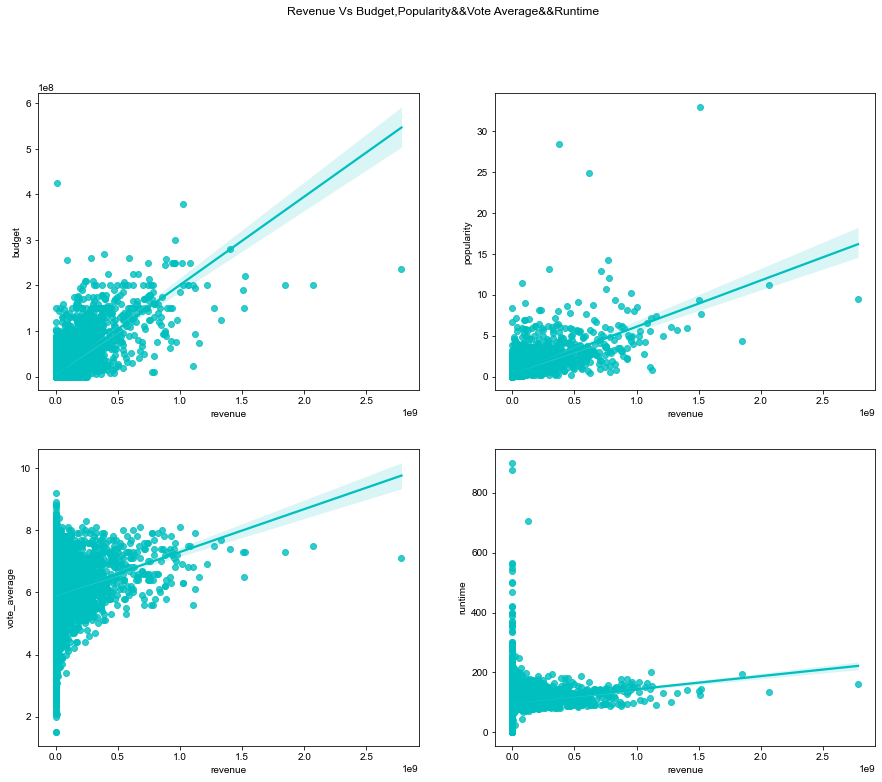

In [25]:
fig, axes = plt.subplots(2,2,figsize = (15,12))
fig.suptitle("Revenue Vs Budget,Popularity&&Vote Average&&Runtime")
sns.regplot(x=df['revenue'], y=df['budget'],color='c',ax=axes[0][0])
sns.regplot(x=df['revenue'], y=df['popularity'],color='c',ax=axes[0][1])
sns.regplot(x=df['revenue'], y=df['vote_average'],color='c',ax=axes[1][0])
sns.regplot(x=df['revenue'], y=df['runtime'],color='c',ax=axes[1][1])
sns.set_style("whitegrid")

In [26]:
def plot_correlation_map( DF ):
    corr = DF.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

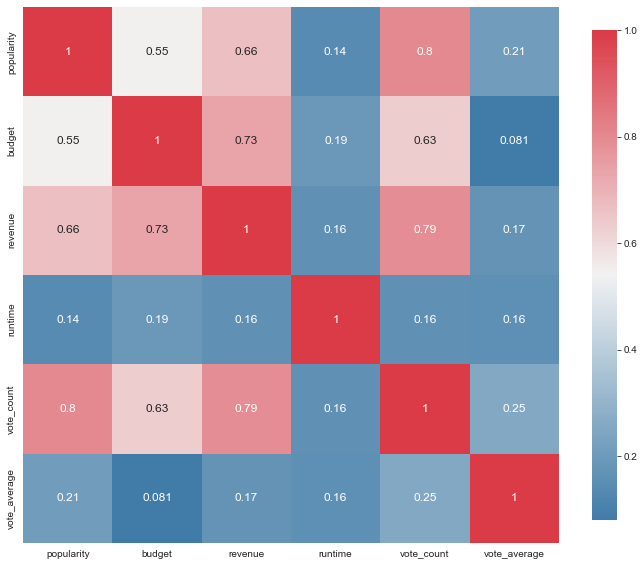

In [27]:
plot_correlation_map(df[['popularity','budget','revenue','runtime','vote_count','vote_average']])

A description of the above plots,

###### Plot 1: Budget vs Revenue

The revenues increase slightly at higher levels but the number of movies with high budgets seem scarce. There is a good possibility that movies with higher investments result in better revenues.

<li>Correlation = 0.68</li>
I can't find a relationship here. The revenues don't seem to change with higher vote average.


###### Plot 2: Popularity vs Revenue

The revenue seems to be increasing with popularity. We can say that if the popularity of movie is high then the revenue of the movie may be high.

<li>Correlation = 0.62</li>


###### Plot 3: Vote Average vs Revenue

The correlation between revenue and vote average is 0.2069. So vote average is not highly related to the revenue.


###### Plot 4: Runtime vs Revenue

The correlation between revenue and runtime is 0.2378. So runtime is not highly related to the revenue.

## Research Question 3:: Top 5 movies which achieved the highest revenue and the lowest one?

create function to find out the highest and the lowest by using the function 'idmin' and 'idmax' 

In [28]:
def find_minmax(x):
    min_index = df[x].idxmin() 
    max_index = df[x].idxmax()
    highest = pd.DataFrame(df.loc[max_index,:])
    lowest = pd.DataFrame(df.loc[min_index,:])
    print("Movie Which Has Highest "+ x + " : ",df['original_title'][max_index])
    print("Movie Which Has Lowest "+ x + "  : ",df['original_title'][min_index])
    return pd.concat([highest,lowest],axis = 1)

In [29]:
find_minmax('revenue')

Movie Which Has Highest revenue :  Avatar
Movie Which Has Lowest revenue  :  Wild Card


1386  \
id                                                                19995   
popularity                                                     9.432768   
budget                                                        237000000   
revenue                                                      2781505847   
original_title                                                   Avatar   
cast                  Sam Worthington|Zoe Saldana|Sigourney Weaver|S...   
director                                                  James Cameron   
keywords              culture clash|future|space war|space colony|so...   
runtime                                                             162   
genres                         Action|Adventure|Fantasy|Science Fiction   
production_companies  Ingenious Film Partners|Twentieth Century Fox ...   
release_date                                        2009-12-10 00:00:00   
vote_count                                                         8458   
vote_average                                                        7.1   
release_year                                                       2009   

                                                                   48    
id                                                               265208  
popularity                                                      2.93234  
budget                                                         30000000  
revenue                                                               0  
original_title                                                Wild Card  
cast                  Jason Statham|Michael Angarano|Milo Ventimigli...  
director                                                     Simon West  
keywords                                      gambling|bodyguard|remake  
runtime                                                              92  
genres                                             Thriller|Crime|Drama  
production_companies  Current Entertainment|Lionsgate|Sierra / Affin...  
release_date                                        2015-01-14 00:00:00  
vote_count                                                          481  
vote_average                                                        5.3  
release_year                                                       2015

>The first column shows the highest revenue made by a movie and second column shows the lowest revenue movie in this dataset. As we can see that 'Avatar' movie Directed by James Cameron made the highest revenue in all, making over 2.78B revenue in this dataset. And the movie which made lowest revenue is 'Wild Card' directed by Simon West.

find top 5 movies which made highest revenue.

In [30]:
details = pd.DataFrame(df['revenue'].sort_values(ascending = False))
details['original_title'] = df['original_title']
data = list(map(str,(details['original_title'])))

extract the top 5 movies with high revenue data from the list and dataframe.

In [31]:
x = list(data[:5])
y = list(details['revenue'][:5])

make the point plot and setup the title and labels.

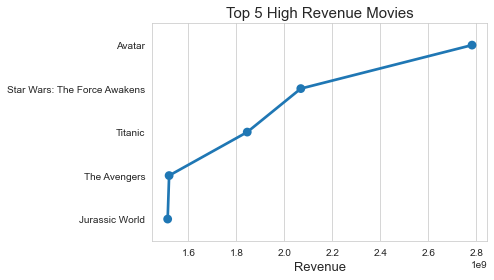

In [32]:
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 5 High Revenue Movies",fontsize = 15)
ax.set_xlabel("Revenue",fontsize = 13)
sns.set_style("darkgrid")

## Research Question 4:: Top 5 movies which  achieved the highest or lowest votes?

use 'find_minmax' function which i made earlier by passsing 'Vote_average' as argument to find the movie with most and least votes.

In [33]:
find_minmax('vote_average')

Movie Which Has Highest vote_average :  The Story of Film: An Odyssey
Movie Which Has Lowest vote_average  :  Transmorphers


3894  \
id                                                               125336   
popularity                                                     0.006925   
budget                                                                0   
revenue                                                               0   
original_title                            The Story of Film: An Odyssey   
cast                  Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...   
director                                                   Mark Cousins   
keywords              cinema|nouvelle vague|hindi cinema|cinema novo...   
runtime                                                             900   
genres                                                      Documentary   
production_companies                                                  0   
release_date                                        2011-09-03 00:00:00   
vote_count                                                           14   
vote_average                                                        9.2   
release_year                                                       2011   

                                                                   7772  
id                                                                25055  
popularity                                                      0.12112  
budget                                                                0  
revenue                                                               0  
original_title                                            Transmorphers  
cast                  Matthew Wolf|Amy Weber|Shaley Scott|Eliza Swen...  
director                                                    Leigh Scott  
keywords                                                     futuristic  
runtime                                                              86  
genres                                 Action|Adventure|Science Fiction  
production_companies                                        Asylum, The  
release_date                                        2007-06-26 00:00:00  
vote_count                                                           10  
vote_average                                                        1.5  
release_year                                                       2007

>The first column containt the movie with highest votes and second column contain the movie with lowest votes.
As we can see that movie 'The Story of Film: An Odyssey' has the maximum rating (92%), which was directed by Mark Cousins and movie with lowest user ratings is 'Transmorphers' with 15% user ratings, which was directed by Leigh Scott.

find top 5 movies which made highest vote by sort the 'vote_average' column in decending order and store it in the new dataframe.

In [34]:
details = pd.DataFrame(df['vote_average'].sort_values(ascending = False))
details['original_title'] = df['original_title']
data = list(map(str,(details['original_title'])))

extract the top 5 highly rated movies data from the list and dataframe.

In [35]:
x = list(data[:5])
y = list(details['vote_average'][:5])

make the point plot and setup the title and labels.

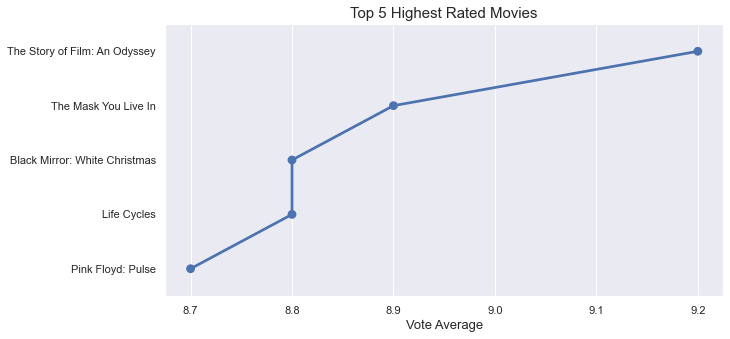

In [36]:
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 5 Highest Rated Movies",fontsize = 15)
ax.set_xlabel("Vote Average",fontsize = 13)
sns.set_style("darkgrid")

## Research Question 5::  Top 5 movies which cost highest and lowest Budget?

first make sure that movie with budget zero didn't affect the result by change the zero into NAN in budget column.

In [37]:
df['budget'] = df['budget'].replace(0,np.NAN)

find the movie with most and least budget.

In [38]:
find_minmax('budget')

Movie Which Has Highest budget :  The Warrior's Way
Movie Which Has Lowest budget  :  Fear Clinic


2244  \
id                                                                46528   
popularity                                                      0.25054   
budget                                                      425000000.0   
revenue                                                        11087569   
original_title                                        The Warrior's Way   
cast                  Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...   
director                                                     Sngmoo Lee   
keywords              assassin|small town|revenge|deception|super speed   
runtime                                                             100   
genres                        Adventure|Fantasy|Action|Western|Thriller   
production_companies                           Boram Entertainment Inc.   
release_date                                        2010-12-02 00:00:00   
vote_count                                                           74   
vote_average                                                        6.4   
release_year                                                       2010   

                                                                   1151  
id                                                               287524  
popularity                                                     0.177102  
budget                                                              1.0  
revenue                                                               0  
original_title                                              Fear Clinic  
cast                  Thomas Dekker|Robert Englund|Cleopatra Coleman...  
director                                                    Robert Hall  
keywords                                             phobia|doctor|fear  
runtime                                                              95  
genres                                                           Horror  
production_companies  Dry County Films|Anchor Bay Entertainment|Movi...  
release_date                                        2014-10-31 00:00:00  
vote_count                                                           15  
vote_average                                                        4.1  
release_year                                                       2014

sort the 'budget' column in decending order and store it in the new dataframe.

In [39]:
details = pd.DataFrame(df['budget'].sort_values(ascending = False))
details['original_title'] = df['original_title']
data = list(map(str,(details['original_title'])))

extract the top 5 budget movies data from the list and dataframe.

In [40]:
x = list(data[:5])
y = list(details['budget'][:5])

plot the figure and setup the title and labels.

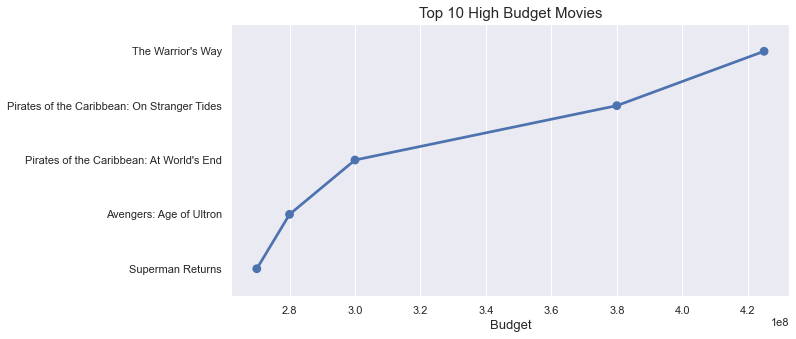

In [41]:
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10, 5)})
ax.set_title("Top 10 High Budget Movies",fontsize = 15)
ax.set_xlabel("Budget",fontsize = 13)
sns.set_style("darkgrid")

## Research Question 6:: In which year release highest number of movies?



make group for each year and count the number of movies in each year

In [42]:
data=df.groupby('release_year').count()['id']
data.tail()

release_year
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64



make group of the data according to release year and count total number of movies in each year and plot it.

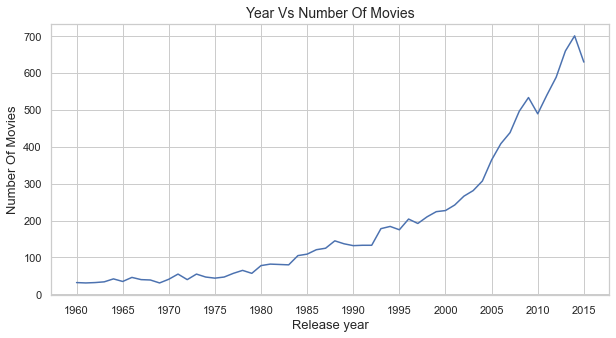

In [45]:
df.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))

#set the figure size, labels and style sheet
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13) 
sns.set_style("whitegrid")









###### After Seeing the plot and the output we can conclude that year 2014 year has the highest release of movies (700) followed by year 2013 (659) and year 2015 (629).

## Research Question 7:: Top 5 movies which achieved highest or lowest profits?

calculate Profit for each of the movie:
>add a new column in the dataframe name 'Profit'

In [46]:
df['Profit'] = df['revenue'] - df['budget']

>find the highest and lowest profit by using my function 'find_minmax'

In [47]:
find_minmax('Profit')

Movie Which Has Highest Profit :  Avatar
Movie Which Has Lowest Profit  :  The Warrior's Way


1386  \
id                                                                19995   
popularity                                                     9.432768   
budget                                                      237000000.0   
revenue                                                      2781505847   
original_title                                                   Avatar   
cast                  Sam Worthington|Zoe Saldana|Sigourney Weaver|S...   
director                                                  James Cameron   
keywords              culture clash|future|space war|space colony|so...   
runtime                                                             162   
genres                         Action|Adventure|Fantasy|Science Fiction   
production_companies  Ingenious Film Partners|Twentieth Century Fox ...   
release_date                                        2009-12-10 00:00:00   
vote_count                                                         8458   
vote_average                                                        7.1   
release_year                                                       2009   
Profit                                                     2544505847.0   

                                                                   2244  
id                                                                46528  
popularity                                                      0.25054  
budget                                                      425000000.0  
revenue                                                        11087569  
original_title                                        The Warrior's Way  
cast                  Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...  
director                                                     Sngmoo Lee  
keywords              assassin|small town|revenge|deception|super speed  
runtime                                                             100  
genres                        Adventure|Fantasy|Action|Western|Thriller  
production_companies                           Boram Entertainment Inc.  
release_date                                        2010-12-02 00:00:00  
vote_count                                                           74  
vote_average                                                        6.4  
release_year                                                       2010  
Profit                                                     -413912431.0

>>The first column shows the highest profit made by a movie and second column shows the highest in loss movie in this dataset.

>>As we can see that 'Avatar' movie Directed by James Cameron earn the highest profit in all, making over 2.5B in profit in this dataset.And the most in loss movie in this dataset is The Warrior's Way. Going in loss by more than 400M was directed by Singmoo Lee.

sort the 'Profit' column in decending order and store it in the new dataframe.

In [48]:
details = pd.DataFrame(df['Profit'].sort_values(ascending = False))
details['original_title'] = df['original_title']
data = list(map(str,(details['original_title'])))

top 5 movies which earn highest profit.

In [49]:
x = list(data[:5])
y = list(details['Profit'][:5])

using pointplot for top 5 profitable movies.

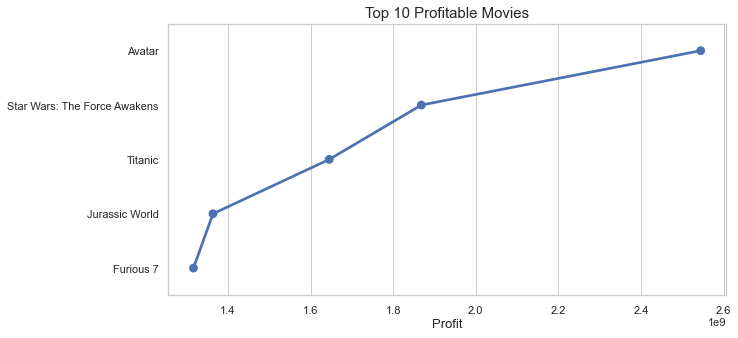

In [50]:
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Profitable Movies",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 13)
sns.set_style("darkgrid")

## Research Question 8:: Top 10 Production Companies produced higher number of release Movies?

create function for spiliing and counting genres.

In [51]:
def count_genre(x):
    x_details = list(map(str,(df[x])))
    modify_genre = []

    for item in x_details:
        temp = item.split('|')
        if type(temp) == list:

            for a in range(0, temp.__len__()):
                asd = temp[a]
                if x_details.__contains__(asd) and  asd != '0':
                    modify_genre.append(asd)
                    continue
                elif x_details.__contains__(asd[:-1]) and asd != '0':
                    modify_genre.append(asd[:-1])
                    continue

                else:
                    continue

        elif x_details.__contains__(temp) and  temp != '0':
            modify_genre.append(temp)
            continue
        else:
            continue


    data = pd.Series(modify_genre)
    #conts each of the genre and return.
    details = data.value_counts(ascending=False)
    return details

use 'count_genre' which I created to count number of movies released by each production company.

In [52]:
production_companies = count_genre('production_companies')

plot barh plot.

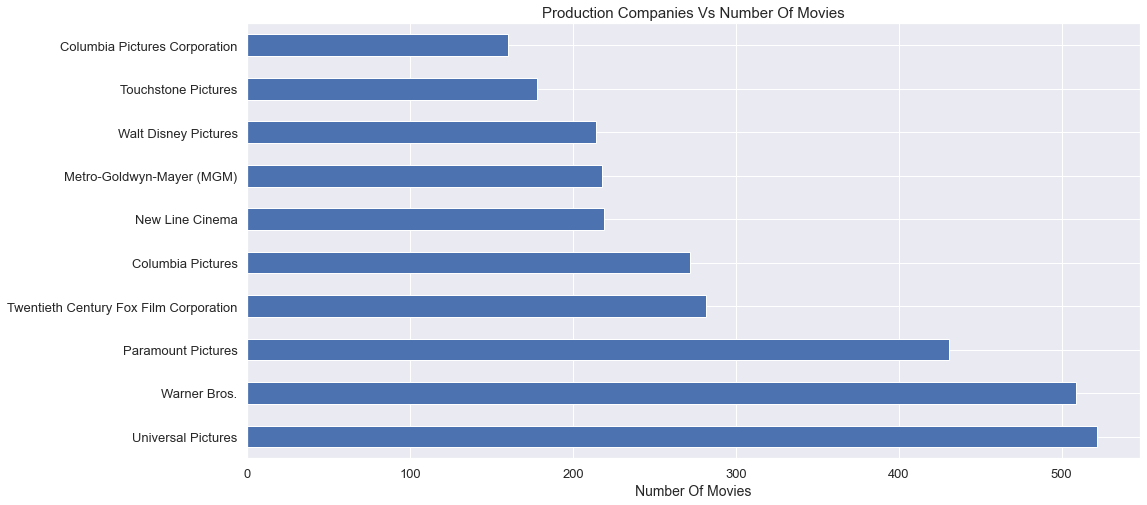

In [53]:
production_companies.iloc[:10].plot(kind='barh',figsize=(16,8),fontsize=13)
plt.title("Production Companies Vs Number Of Movies",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=14)
sns.set_style("whitegrid")


>>From the plot we find out that the highest number of movie is created by 'Universal Pictures' , 'Warner Bros' and 'Paramount Pictures'

### Research Question 9:: Top 10 Directors Who directs highest number of movies movies?

use 'count_genre' function which we made earlier for spiliing and counting genres it will count number of movies directed by each diretor.

In [54]:
director_movies_counter = count_genre('director')

plot barh graph

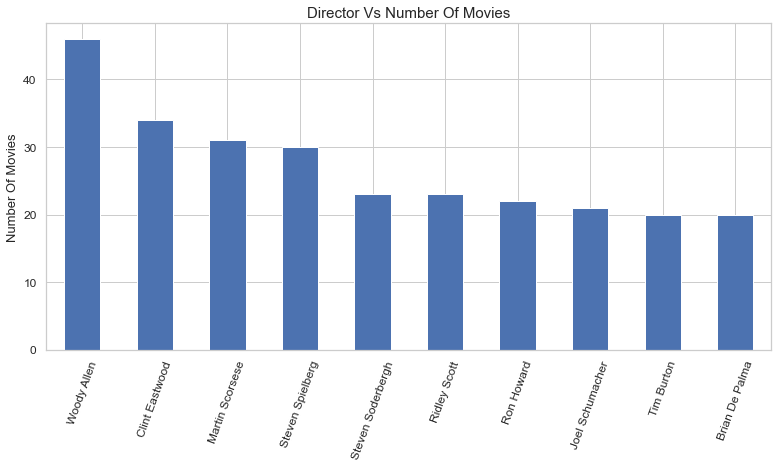

In [56]:
director_movies_counter.iloc[:10].plot(kind='bar',figsize=(13,6),fontsize=12)

#setup the title and the labels
plt.title("Director Vs Number Of Movies",fontsize=15)
plt.xticks(rotation=70)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")

>>From this we can find the successful diroctor and the most popular.

### Research Question 10:: Most popular star cast?

use 'count_genre' function which we made earlier for spiliing and counting genres it wiil count number of movies done by each actor.

In [57]:
actor_flims_counter = count_genre('cast')

plot barh graph

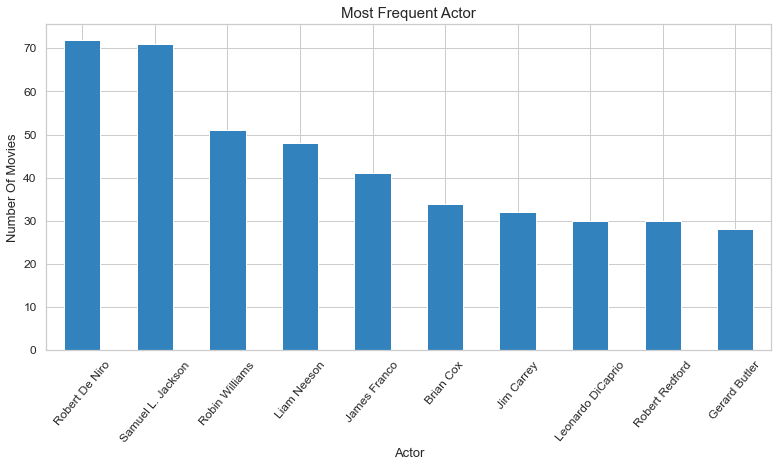

In [58]:
actor_flims_counter.iloc[:10].plot.bar(figsize=(13,6),colormap='tab20c',fontsize=12)

#setup the title and the labels of the plot.
plt.title("Most Frequent Actor",fontsize=15)
plt.xticks(rotation = 50)
plt.xlabel('Actor',fontsize=13)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")

>>From this we can see the most 10 popular actors so we can decide which successful actor to make contract with him.

<a id='conclusions'></a>
## Conclusions

<ul>
<li>Movies with higher budgets have shown a corresponding increase in the revenues.</li>
<li>Maximum Number Of Movies Release In year 2014.</li>
<li>'Avatar', 'Star Wars' and 'Titanic' are the most profitable movies and 'The Warrior's Way' is the lowest profitable movie.</li>       
<li>Warner Bros, Universal Pictures and Paramount Pictures production companies earn more life time profit than other production companies.</li>    
<li>'Woody Allen' and 'Clint Eastwood' the most directors Who directs highest number of movies movies</li> 
<li>'Robert De Niro' and 'Samuel L.Jackson' are the most popular star cast</li>    
    
</ul>

### Limitations
<ul>
<li>It's not 100 percent guaranteed solution that this formula is gonna work, But it shows us that we have high probability of making high profits if we had similar characteristics as such.</li>
<li> If we release a movie with these characteristics, it gives people high expectations from this movie.</li>
<li> This was just one example of an influantial factor that would lead to different results, there are many that have to be taken care of.</li>    
<li>During the data cleaning process, I split the data seperated by '|' into lists for easy parsing during the exploration phase.</li>
<li> This increases the time taken in calculating the result.</li>    

</ul>

In [307]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1